# Rede Neural para Classificação de Imagens

Por José Geraldo Dantas Nunes

https://medium.com/data-hackers/uma-introdu%C3%A7%C3%A3o-as-redes-neurais-convolucionais-utilizando-o-keras-41ee8dcc033e

<h3>Problema: </h3>

Classificar e reconhecer de imagens números manuscritos de 0 a 9 baseados na competição disponível em https://www.kaggle.com/c/digit-recognizer/data

 Bibliotecas para desenvolvimento da Rede Neural Convolucional

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.models import Sequential
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

<h3> Arquivos para Treinamento </h3>
<br/>
Inicialização do conjunto de dados para treinamento e teste da rede neural.

In [2]:
dados_treino = pd.read_csv('train.csv')
dados_teste = pd.read_csv('test.csv')

<h3> Pré Processamento dos dados de entrada para o modelo de classificação</h3>

In [3]:
np.random.seed(2)
x_teste = dados_teste.values.reshape((dados_teste.shape[0], 28, 28, 1))

x_treino = dados_treino.drop(["label"], axis=1).values
x_treino = x_treino.reshape((x_treino.shape[0], 28, 28, 1))
y_treino = dados_treino["label"].values
y_treino = np_utils.to_categorical(y_treino)

Exibe imagens aleatórias do conjunto de dados após o processamento

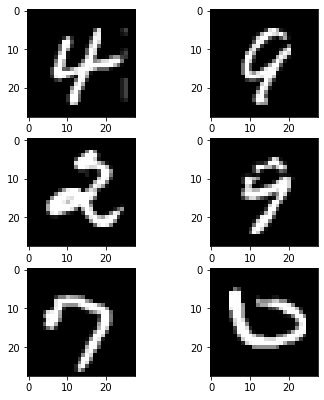

In [4]:
for i in range(0, 6):
    num = np.random.randint(0, len(x_treino))
    imagem = x_treino[num]
    plt.subplot(3,2,i+1)
    plt.imshow(imagem.reshape(28, 28), cmap=plt.get_cmap('gray'))
plt.subplots_adjust(top=1.4)
plt.show()

<h3> Inicialização da Rede Neural </h3>

In [5]:
"""
    Configuração de criação da Rede Neural
        02 camadas convolucionais (Conv2D) para processamento de imagens, sendo uma com 32 neurônios e outra com 64 neurônios e funções de ativação RELU
        01 camada de agrupamento (MaxPooling2D)
        02 camadas densas (Dense), sendo uma com 128 neurônios e 10 neurônios e funções de ativação RELU e SOFTMAX
        02 camadas Dropout para evitar overfitting durante o treinamento
        01 camada Flatten para nivelar os dados treinados
                
    Obs.: Os parâmetros foram selecionados de acordo com uma sequência de testes até alcançar um resultado satisfatório    
"""

redeConv = Sequential()
redeConv.add(Conv2D(32, (5,5), activation='relu', padding='same', input_shape=(28, 28,1)))
redeConv.add(Conv2D(20, (5,5), activation='relu', padding='same'))
redeConv.add(MaxPooling2D(pool_size=(2,2)))
redeConv.add(Dropout(0.45))
redeConv.add(Flatten())
redeConv.add(Dense(30, activation='relu'))
redeConv.add(Dense(10, activation='softmax'))

<h3>Compilação da Rede Neural</h3>

In [6]:
redeConv.compile(optimizer = 'adam', # Métrica de otimização do modelo
              loss = 'categorical_crossentropy', # Função de cálculo de perda do modelo
              metrics = ['accuracy']) # Métrica de monitoramento da execução correta do modelo

<h3>Estrutura e Configuração da Rede Neural</h3>

In [7]:
redeConv.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 20)        16020     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 20)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 20)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3920)              0         
_________________________________________________________________
dense (Dense)                (None, 30)                117630    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

<h3>Histórico de treinamento da Rede Neural</h3>

In [8]:
historico = redeConv.fit(x_treino,
                        y_treino,
                        batch_size = 32,
                        epochs = 15,
                        validation_split=0.2,
                        verbose = 1)

Epoch 1/15
1050/1050 [==============================] - 45s 43ms/step - loss: 0.4785 - accuracy: 0.8729 - val_loss: 0.0895 - val_accuracy: 0.9712
Epoch 2/15
1050/1050 [==============================] - 47s 44ms/step - loss: 0.1220 - accuracy: 0.9632 - val_loss: 0.0706 - val_accuracy: 0.9790
Epoch 3/15
1050/1050 [==============================] - 50s 48ms/step - loss: 0.1030 - accuracy: 0.9688 - val_loss: 0.0762 - val_accuracy: 0.9768
Epoch 4/15
1050/1050 [==============================] - 51s 49ms/step - loss: 0.0913 - accuracy: 0.9715 - val_loss: 0.0669 - val_accuracy: 0.9818
Epoch 5/15
1050/1050 [==============================] - 50s 47ms/step - loss: 0.0804 - accuracy: 0.9751 - val_loss: 0.0615 - val_accuracy: 0.9817
Epoch 6/15
1050/1050 [==============================] - 55s 52ms/step - loss: 0.0764 - accuracy: 0.9765 - val_loss: 0.0643 - val_accuracy: 0.9826
Epoch 7/15
1050/1050 [==============================] - 52s 50ms/step - loss: 0.0691 - accuracy: 0.9793 - val_loss: 0.0594 -

<h3> Avaliação do modelo</h3>
<br/>
Taxa de Perda da Rede Neural

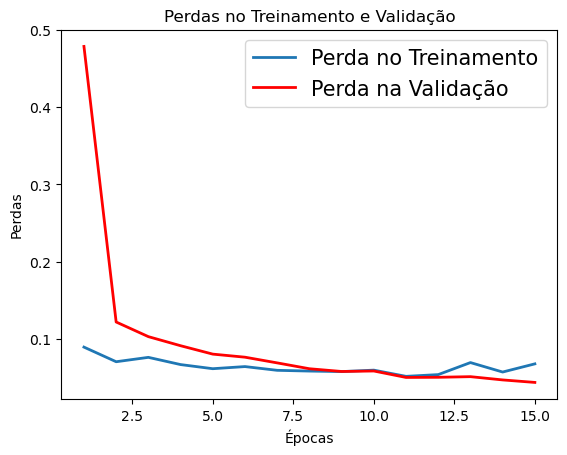

In [9]:
perda = historico.history['loss']
valor_perda = historico.history['val_loss']
epoca = range(1 , len(perda) + 1)

plt.style.use('default')
plt.title('Perdas no Treinamento e Validação')
plt.xlabel('Épocas') 
plt.ylabel('Perdas')

valor_perda = plt.plot(epoca, valor_perda, label='Perda no Treinamento')
perda_treino = plt.plot(epoca, perda, label='Perda na Validação', color="r")

plt.setp(valor_perda, linewidth=2.0)
plt.setp(perda_treino, linewidth=2.0)

plt.rc('font', size = 15)
plt.rc('figure', figsize=[10,10])
plt.legend()
plt.show()

Taxa de Acurácia da Rede Neural

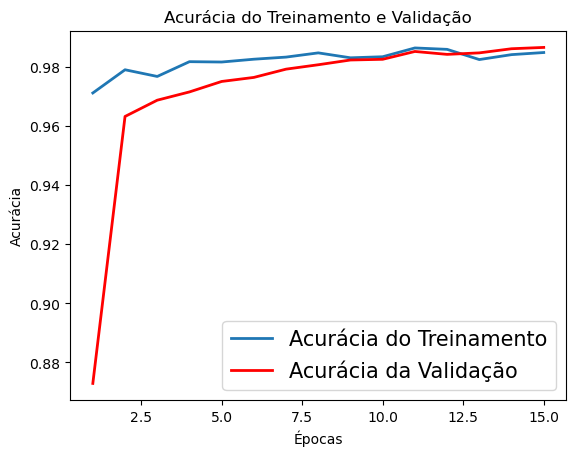

In [10]:
acuracia = historico.history['accuracy']
val_acuracia = historico.history['val_accuracy']
epoca = range(1, len(acuracia) + 1)

plt.style.use('default')
plt.title('Acurácia do Treinamento e Validação')
plt.xlabel('Épocas') 
plt.ylabel('Acurácia')

valor_acuracia = plt.plot(epoca, val_acuracia, label='Acurácia do Treinamento')
acuracia_treino = plt.plot(epoca, acuracia, label='Acurácia da Validação', color="r")

plt.setp(valor_acuracia, linewidth=2.0)
plt.setp(acuracia_treino, linewidth=2.0)

plt.rc('font', size = 15)
plt.rc('figure', figsize=[10,10])
plt.legend()
plt.show()

<h3> Predição do modelo aplicando dados de teste </h3>

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


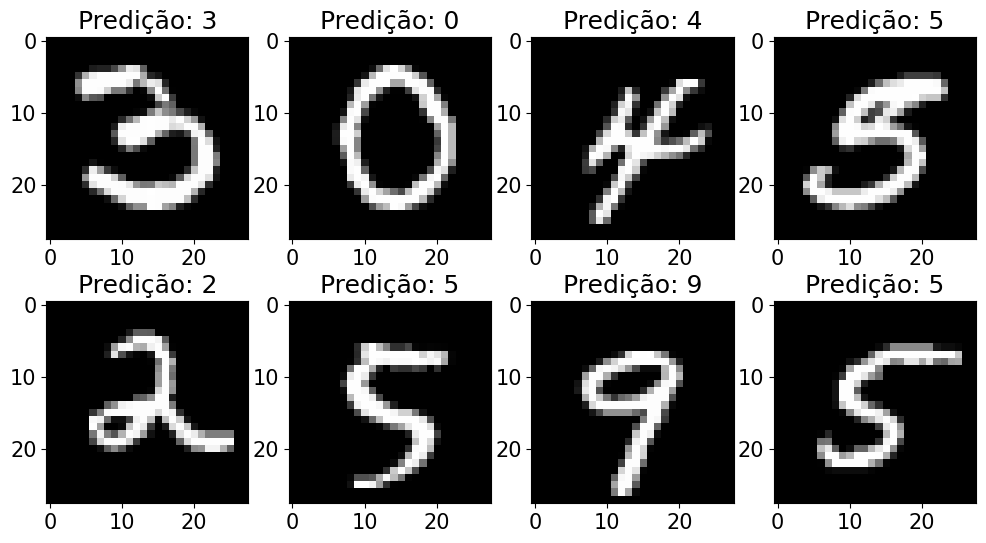

In [11]:
predicao = redeConv.predict_classes(x_teste)

plt.figure(figsize=(12,20))
for i in range(0, 8):
    num = np.random.randint(0, len(x_teste))
    imagem = x_teste[num]
    plt.subplot(6,4,i+1)
    plt.margins(x = 20, y = 20)
    plt.title('Predição: ' + str(predicao[num]))
    plt.imshow(imagem.reshape(28, 28), cmap=plt.get_cmap('gray'))
plt.show()

submission = pd.DataFrame({'ImageID' : pd.Series(range(1,28001)), 'Label' : predicao})
submission.to_csv("submission.csv",index=False)

